## _Import Libraries_

In [1]:
import pandas as pd
import numpy as np

## _Read in the data_

In [2]:
file1 = pd.read_csv('qualityOfLifeIndex.csv').drop(columns=['Rank'])
file2 = pd.read_csv('costOfLivingIndex.csv').drop(columns=['Rank'])

display(file1.head(3), file2.head(3))

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,Switzerland,190.82,110.96,78.65,74.47,131.75,8.42,28.73,20.09,80.05
1,Denmark,190.01,94.73,73.28,79.96,91.67,6.66,28.69,20.40,81.80
2,Netherlands,183.31,83.89,72.78,75.76,78.64,7.35,27.81,25.28,87.11


,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Bermuda,145.07,92.86,120.13,141.77,157.70,83.43
1,Switzerland,131.75,55.05,95.10,133.36,126.08,110.96
2,Norway,106.09,36.18,72.68,100.59,105.90,79.43


### _merge appropriately_

In [3]:
merged_df = pd.merge(file1.drop(columns = ['Purchasing Power Index', 'Cost of Living Index']), 
                     file2.drop(columns = ['Cost of Living Plus Rent Index']), 
                     on=['Country'], 
                     how='outer'
                    ).fillna(0).reset_index(drop=True)

merged_df.Country = merged_df.Country.str.strip()
display(merged_df)

,Country,Quality of Life Index,Safety Index,Health Care Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,190.82,78.65,74.47,8.42,28.73,20.09,80.05,131.75,55.05,133.36,126.08,110.96
1,Denmark,190.01,73.28,79.96,6.66,28.69,20.40,81.80,91.67,36.18,72.62,104.92,94.73
2,Netherlands,183.31,72.78,75.76,7.35,27.81,25.28,87.11,78.64,39.31,61.63,81.62,83.89
3,Finland,182.79,72.99,76.40,8.64,28.96,11.86,56.64,77.46,28.04,65.60,81.22,89.05
4,Austria,182.37,74.77,78.40,10.40,25.68,19.20,77.79,75.49,28.42,67.62,70.98,78.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Zambia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.06,6.75,27.12,16.18,59.47
134,Uzbekistan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27.12,8.06,23.91,21.43,21.96
135,Afghanistan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.33,3.85,19.30,16.98,26.58
136,Kyrgyzstan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.98,7.43,20.57,19.19,22.01


_Export as single file_

In [4]:
merged_df.to_csv('costOfLiving_tampered.csv')

# Questions

## Transportation

In [5]:
new_df = pd.read_csv('costOfLiving_tampered.csv')

print(*new_df.columns, sep = '\n')

Unnamed: 0
Country
Quality of Life Index
Safety Index
Health Care Index
Property Price to Income Ratio
Traffic Commute Time Index
Pollution Index
Climate Index
Cost of Living Index
Rent Index
Groceries Index
Restaurant Price Index
Local Purchasing Power Index


### Top countries with ease of movement

In [6]:
transportation = new_df.sort_values('Traffic Commute Time Index')

transportation = transportation[transportation['Traffic Commute Time Index'] > 0]
transportation = transportation[['Country', 'Traffic Commute Time Index','Pollution Index','Climate Index']].reset_index(drop=True)

display(transportation[:23])

,Country,Traffic Commute Time Index,Pollution Index,Climate Index
0,Iceland,19.98,16.24,68.81
1,Oman,23.02,37.59,67.22
2,Cyprus,23.44,56.77,93.34
3,Estonia,24.72,19.01,64.28
4,Lithuania,25.67,27.01,69.86
5,Austria,25.68,19.20,77.79
6,Bosnia And Herzegovina,25.89,60.71,80.48
7,Slovenia,26.79,22.65,77.56
8,Norway,26.87,18.14,68.68
9,North Macedonia,27.22,80.03,76.30


*Looks like Traffic, Pollution and climate aren't as dependent as i thought they would be.   
Pollution Index and climate seem to have a shaky relationship though. Maybe look into it in another project? __No Now!!__*

### Check correlation between Traffic Commute Time Index, Pollution Index and Climate Index

In [7]:
"""
Traffic Commute Time Index TCTI
Pollution Index PI
Climate Index CI
"""
from matplotlib import pyplot

tcti = new_df['Traffic Commute Time Index']
pi = new_df['Pollution Index']
ci = new_df['Climate Index']

print('Traffic Commute Time Index mean: %s \t Pollution Index mean: %s \t Climate Index mean: %s \nTraffic Commute Time Index std: %s \t Pollution Index std: %s \t Climate Index std: %s '%(np.mean(tcti), np.mean(pi), np.mean(ci), np.std(tcti), np.std(pi), np.std(ci)))

Traffic Commute Time Index mean: 21.748478260869565 	 Pollution Index mean: 31.825724637681166 	 Climate Index mean: 46.673405797101445 
Traffic Commute Time Index std: 18.916126235101135 	 Pollution Index std: 30.42690513934925 	 Climate Index std: 40.02064471766965 


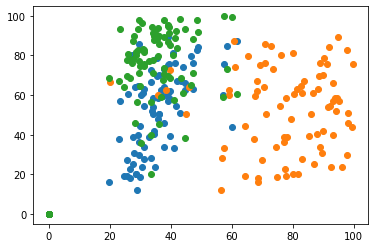

In [8]:
pyplot.scatter(tcti, pi) #Has the minimum linearity (Orange)
pyplot.scatter(ci, pi) # Has some linearity (Blue)
pyplot.scatter(tcti, ci) # Welp (Green)
 
pyplot.show()

*From the plot we can see there is barely a relationship between the pairs*

In [9]:
from scipy.stats import pearsonr

corr1, _ = pearsonr(tcti, pi) 
corr2, _ = pearsonr(tcti, ci)
corr3, _ = pearsonr(pi, ci)

print('Covariance of Traffic Commute Time Index : Pollution Index: %s \nTraffic Commute Time Index : Climate Index: %s\nPollution Index: Climate Index : %s' %(corr1, corr2, corr3))

Covariance of Traffic Commute Time Index : Pollution Index: 0.9020864451308938 
Traffic Commute Time Index : Climate Index: 0.8992827901260081
Pollution Index: Climate Index : 0.803824644556709


In [41]:
tcti.cov(pi), tcti.cov(ci)

(522.9939445414146, 685.7583205490316)

**Looks like there is high correlation between all pairs of variables**

In [10]:
display(
            transportation[['Country','Traffic Commute Time Index']].head(4),
            transportation[['Country','Traffic Commute Time Index']].tail(4)
       ) # Top 4 Countries with least commute and Top 4 with highest commute time index

,Country,Traffic Commute Time Index
0,Iceland,19.98
1,Oman,23.02
2,Cyprus,23.44
3,Estonia,24.72


,Country,Traffic Commute Time Index
79,Kenya,57.39
80,Bangladesh,58.53
81,Costa Rica,60.19
82,Nigeria,61.68


## Lodging

In [11]:
lodging = new_df.sort_values('Rent Index')

lodging = lodging[lodging['Rent Index'] > 0]
lodging = lodging[['Country', 'Rent Index','Groceries Index','Property Price to Income Ratio','Local Purchasing Power Index']].reset_index(drop=True)

display(lodging)

,Country,Rent Index,Groceries Index,Property Price to Income Ratio,Local Purchasing Power Index
0,Afghanistan,3.85,19.30,0.00,26.58
1,Pakistan,4.37,19.06,12.62,27.28
2,Nepal,4.54,26.45,0.00,20.63
3,Bangladesh,4.90,31.49,14.43,24.07
4,Algeria,5.01,29.09,0.00,24.77
...,...,...,...,...,...
133,Switzerland,55.05,133.36,8.42,110.96
134,Luxembourg,61.62,80.71,0.00,95.38
135,Singapore,64.77,75.31,19.38,83.62
136,Hong Kong,74.24,81.73,45.19,62.45


In [12]:
# calculating quantiles

lodging.quantile([0,0.33,0.66])#['Local Purchasing Power Index'].tolist()

,Rent Index,Groceries Index,Property Price to Income Ratio,Local Purchasing Power Index
0.00,3.8500,19.0600,0.0000,1.4200
0.33,10.3047,33.9896,0.0000,28.2097
0.66,18.2370,48.7820,10.6978,51.2090


## Safety

In [13]:
safety = new_df[['Country','Safety Index']]

safety = safety[safety['Safety Index'] > 0]

safety

,Country,Safety Index
0,Switzerland,78.65
1,Denmark,73.28
2,Netherlands,72.78
3,Finland,72.99
4,Austria,74.77
...,...,...
78,Philippines,57.84
79,Kenya,38.60
80,Bangladesh,35.78
81,Iran,50.81


__Is there a relationship between commute time and safety?__

/Users/iffiness/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Traffic Commute Time Index', ylabel='Safety Index'>

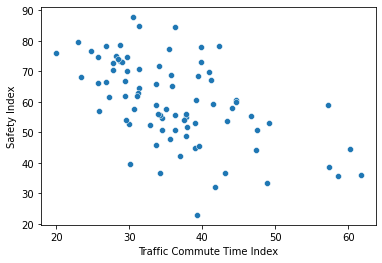

In [42]:
sns.scatterplot(new_df[new_df['Safety Index'] > 0]['Traffic Commute Time Index'], safety['Safety Index'])

_Distribution looks pretty random_

In [15]:
corr, _ = pearsonr(new_df[new_df['Safety Index'] > 0]['Traffic Commute Time Index'], safety['Safety Index'])

print('Correlation of traffic commute and safety of %s'%corr)

Correlation of traffic commute and safety of -0.5475032120055146


Inverse correlation??? _Interesting_

Does this mean the higher the dissatisfaction from commute the lower the safety? __Maybe__

## Dinning Out

In [16]:
print(*new_df.columns.values.tolist(), sep='\n')

Unnamed: 0
Country
Quality of Life Index
Safety Index
Health Care Index
Property Price to Income Ratio
Traffic Commute Time Index
Pollution Index
Climate Index
Cost of Living Index
Rent Index
Groceries Index
Restaurant Price Index
Local Purchasing Power Index


In [17]:
posh = new_df[['Country','Restaurant Price Index']]

_ I feel there should be a relationship between how often the weather changes, how safe the country is and how often people go out to eat_

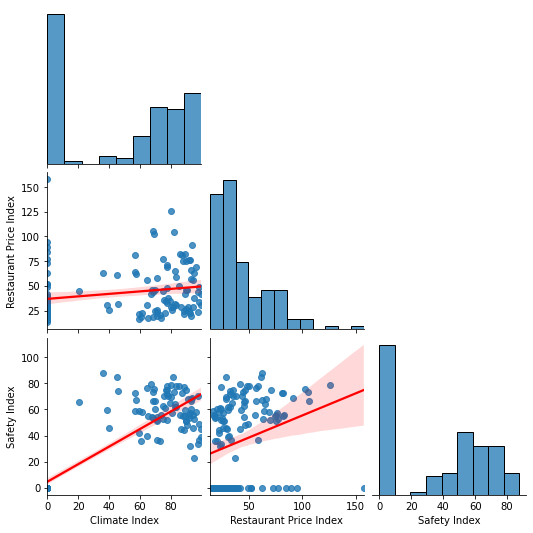

In [18]:
import seaborn as sns

sns.pairplot(new_df,
             corner=True,
             vars=['Climate Index', 'Restaurant Price Index','Safety Index'],
             kind='reg',
             plot_kws={'line_kws':{'color':'red'}})

In [19]:
#sns.distplot(x=posh)

corr, pval = pearsonr(new_df['Restaurant Price Index'], new_df['Safety Index'])
corr1, pval1 = pearsonr(new_df['Restaurant Price Index'], new_df['Climate Index'])

print('Restaurant Price Index, Safety Index: p-value %s correlation-coefficient %s'%(pval, corr))
print('Restaurant Price Index, Climate Index: p-value %s correlation-coefficient %s'%(pval1, corr1))

Restaurant Price Index, Safety Index: p-value 0.0012698895507430863 correlation-coefficient 0.27162826173619786
Restaurant Price Index, Climate Index: p-value 0.017803721164584157 correlation-coefficient 0.2014795908896057


Restaurant Price Index and Climate Index have a p-value approximately > 0.01 so it isn't statistically significant. However, Restaurant Price Index and Safety Index have a p-value < 0.01 so it is statistically significant with a positive correlation of 0.2.

In [26]:
x, y = [],[]

for i in range(len(posh),0,-1):
    x.append(posh['Restaurant Price Index']*np.sin(i))
    y.append(posh['Restaurant Price Index']*np.cos(i))

print(len(x), len(y), len(posh))

posh['x'] = x
posh['y'] = y

display(posh.head(3))

#export
posh.to_csv('Dining.csv')

138 138 138
<ipython-input-26-9b950d9e9463>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posh['x'] = x
<ipython-input-26-9b950d9e9463>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posh['y'] = y


,Country,Restaurant Price Index,x,y
0,Switzerland,126.08,0 -28.752829 1 -23.927243 2 -18.61...,0 122.757652 1 102.155242 2 79...
1,Denmark,104.92,0 -118.832222 1 -98.888617 2 -76...,0 42.131571 1 35.060632 2 27.27...
2,Netherlands,81.62,0 -99.657819 1 -82.932252 2 -64.51...,0 -77.230082 1 -64.268561 2 -49.99...


In [30]:
posh = new_df[['Country','Safety Index','Restaurant Price Index','Climate Index']]
posh = posh[posh['Safety Index'] > 0]

In [45]:
#print(*posh['Restaurant Price Index'].values.tolist(), sep=' \n')




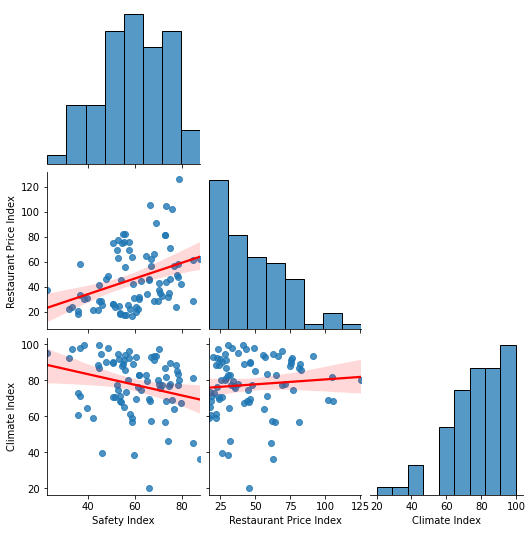

In [44]:
sns.pairplot(posh,
             corner=True,
             kind='reg',
             plot_kws={'line_kws':{'color':'red'}})

_ Transformation of the data_

In [51]:
posh_df1 = pd.DataFrame(columns=['Country','Value','Category'])
posh_df1 = posh_df1.fillna(0)

posh_df1['Country'] = posh.Country
posh_df1['Value'] = posh['Safety Index']
posh_df1['Category'] = 'Safety Index'

posh_df2 = pd.DataFrame(columns=['Country','Value','Category'])
posh_df2 = posh_df2.fillna(0)

posh_df2['Country'] = posh.Country
posh_df2['Value'] = posh['Restaurant Price Index']
posh_df2['Category'] = 'Restaurant Price Index'

posh_df3 = pd.DataFrame(columns=['Country','Value','Category'])
posh_df3 = posh_df3.fillna(0)

posh_df3['Country'] = posh.Country
posh_df3['Value'] = posh['Climate Index']
posh_df3['Category'] = 'Climate Index'

posh_final = pd.concat([posh_df1, posh_df2, posh_df3]).reset_index()
posh_final

,index,Country,Value,Category
0,0,Switzerland,78.65,Safety Index
1,1,Denmark,73.28,Safety Index
2,2,Netherlands,72.78,Safety Index
3,3,Finland,72.99,Safety Index
4,4,Austria,74.77,Safety Index
...,...,...,...,...
244,78,Philippines,61.03,Climate Index
245,79,Kenya,99.79,Climate Index
246,80,Bangladesh,72.91,Climate Index
247,81,Iran,70.99,Climate Index


_Export to csv_

In [52]:
posh_final.to_csv('Dining_1.csv', index=True)